# Graphviz Topology Graph

In this example, we will demonstrate how you can visualize the topology of a power system model using [Graphviz](http://graphviz.org).
This demo uses IPython's [Rich Display feature](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) to show the rendered topology graph as a Scalable Vector Graphic (SVG) inline with the IPython interpreter or the Jupyter Notebook.

We start by importing several packages required by DPsim itself.

In [1]:
import os
import dpsim as dps
import dpsim.components.dp as dp
import dataprocessing.readtools as rt
import dataprocessing.timeseries as ts

Next, we need to import the IPython Rich Display function

In [2]:
from IPython.display import display as display

Then we define a simple network:

In [3]:
# Nodes
gnd = dps.Node.GND()
n1 = dps.Node("n1")
n2 = dps.Node("n2")
n3 = dps.Node("n3")
n4 = dps.Node("n4")

# Components
v1 = dp.VoltageSource("v_1", [gnd, n1], 345)
r1 = dp.Resistor("r1", [n1, n2], 5)
c1 = dp.Capacitor("c_1", [n2, gnd], 0.002)
rL1 = dp.Resistor("r_load1", [n2, n4], 6.4)
l1 = dp.Inductor("l_1", [n4, n3], 0.186)
c2 = dp.Capacitor("c_2", [n3, gnd], 0.002)
rL2 = dp.Resistor("r_load2", [n3, gnd], 150)

system = dps.SystemTopology(50, [gnd, n1, n2, n3, n4], [v1, r1, c1, rL1, l1, c2, rL2])

Before we display the graph of this network, we will run a short simulation in order to bring the system into a steady state.
This is useful, as we will be able to inspect the component and node states in the rendered graph.

In [4]:
sim = dps.Simulation('IdealVS_PiLine_RLC_1', system, duration=0.2, timestep=0.00005)
sim.run()

Finally, we can render the graph of the network topology:

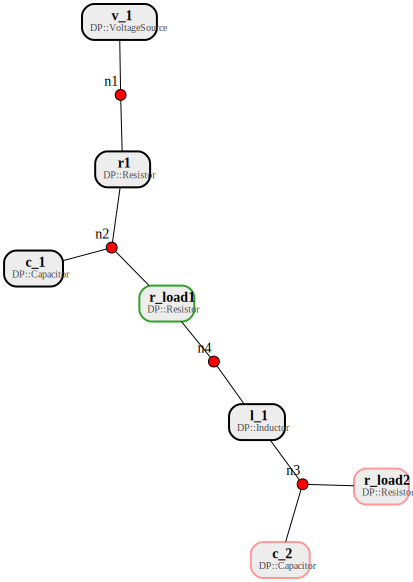

In [6]:
display(system)

By hovering the mouse pointer over the component nodes a tooltip will appear.
This tooltip lists all attributes of a component including its internal states such as voltage and current.